In [1]:
import numpy as np
import pandas as pd
import pyarrow.csv as csv
import os

In [2]:
raw_df = pd.DataFrame()
flag = True
for csvList in os.listdir('../data/raw_csv'):
    if flag:
        raw_df = csv.read_csv('../data/raw_csv/'+csvList).to_pandas()
        flag = False
    else:
        raw_df = pd.concat([raw_df,csv.read_csv('../data/raw_csv/'+csvList).to_pandas()])
raw_df


,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16,00281,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,
676908,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17,00316,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,
676909,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18,00338,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,
676910,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19,00183,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,


In [25]:
# 일별 상품별 총 판매량
item_df = raw_df[
    ['ITEM_CD',
    'BKG_DATE',
    'ITEM_QTY',]
]
item_df.sort_values(by = 'BKG_DATE',inplace=True)
result = item_df.groupby(['ITEM_CD','BKG_DATE']).sum().reset_index()    
result.to_csv('../data/processed_csv/item_sum.csv',index =False, encoding = 'utf-8-sig')

C:\Users\painc\Anaconda3\envs\iitp_keras\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [112]:
# 구매 일수가 10이하의 상품 제거
check_count = result.groupby('ITEM_CD').count().reset_index()
result[result.ITEM_CD.isin(check_count[check_count.BKG_DATE>10].ITEM_CD)]

,ITEM_CD,BKG_DATE,ITEM_QTY
0,0001,20210421,8
1,0001,20210422,19
2,0001,20210423,87
3,0001,20210424,18
4,0001,20210425,21
...,...,...,...
304799,whole800002,20210626,16
304800,whole800002,20210627,21
304801,whole800002,20210628,33
304802,whole800002,20210629,34


In [162]:
# int to Datetime
forProphet_df = result.copy()
# forProphet_df.BKG_DATE = pd.to_datetime(forProphet_df.BKG_DATE.astype(str)).dt.tz_localize('UTC')
forProphet_df.BKG_DATE = pd.to_datetime(forProphet_df.BKG_DATE.astype(str))
forProphet_df.sort_values(by = ['ITEM_CD','BKG_DATE'],inplace=True)


In [163]:
forProphet_df.groupby(['ITEM_CD']).count().reset_index().sort_values(by = 'BKG_DATE',ascending=False)

,ITEM_CD,BKG_DATE,ITEM_QTY
7407,4905164407,122,122
6774,4824061918_14,122,122
15302,598604962-1,122,122
6591,4802177320_3,122,122
6794,4824061918_33,122,122
...,...,...,...
14395,5582257070_040,1,1
8918,5048307977,1,1
8916,5048302044,1,1
8915,5048299035,1,1


In [164]:
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [257]:
test_df=  forProphet_df[forProphet_df['ITEM_CD'] == '4824061918_14']
# test_df.set_index('BKG_DATE',inplace=True)
test_df = test_df[test_df.columns[1:]]
test_df['DATE'] = test_df['BKG_DATE']
test_df.set_index('DATE',inplace=True)
test_df.columns = ['ds','y']


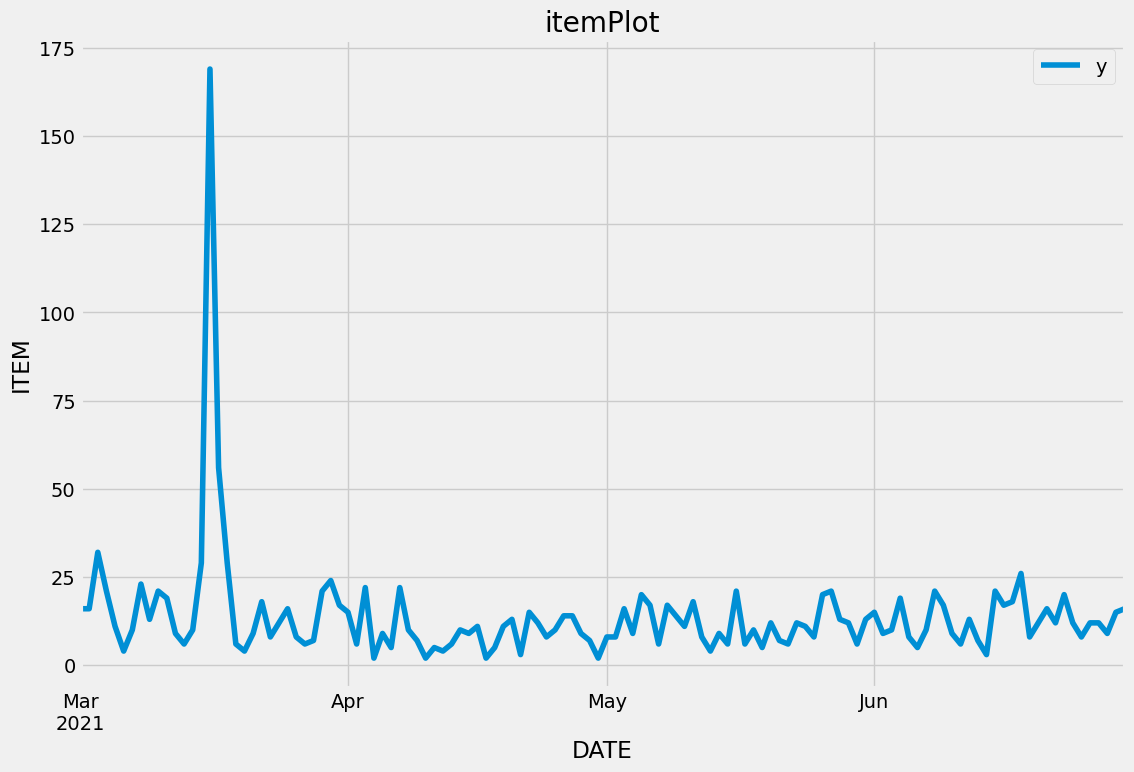

In [258]:

ax = test_df[['y']].plot(title = 'itemPlot',figsize = (12,8))
ax.set_ylabel('ITEM')
ax.set_xlabel('DATE')
plt.show()

In [259]:
df_prophet = Prophet(changepoint_prior_scale= 0.15, daily_seasonality=True)
df_prophet.fit(test_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [260]:
fcast_time = 365
df_forcast = df_prophet.make_future_dataframe(periods = fcast_time,freq = "D")
df_forcast = df_prophet.predict(df_forcast)

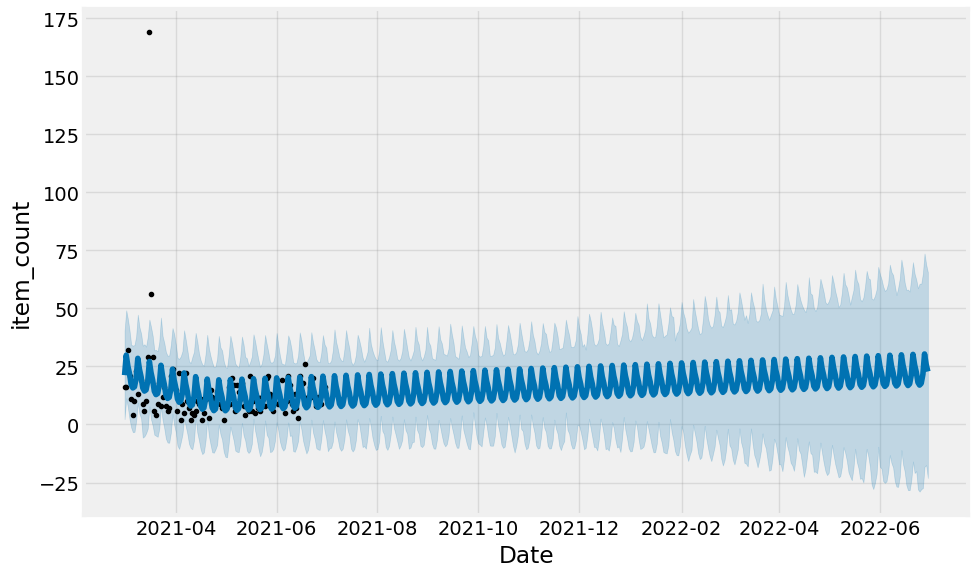

In [ ]:
plt.clf
df_prophet.plot(df_forcast,xlabel='Date',ylabel='item_count')

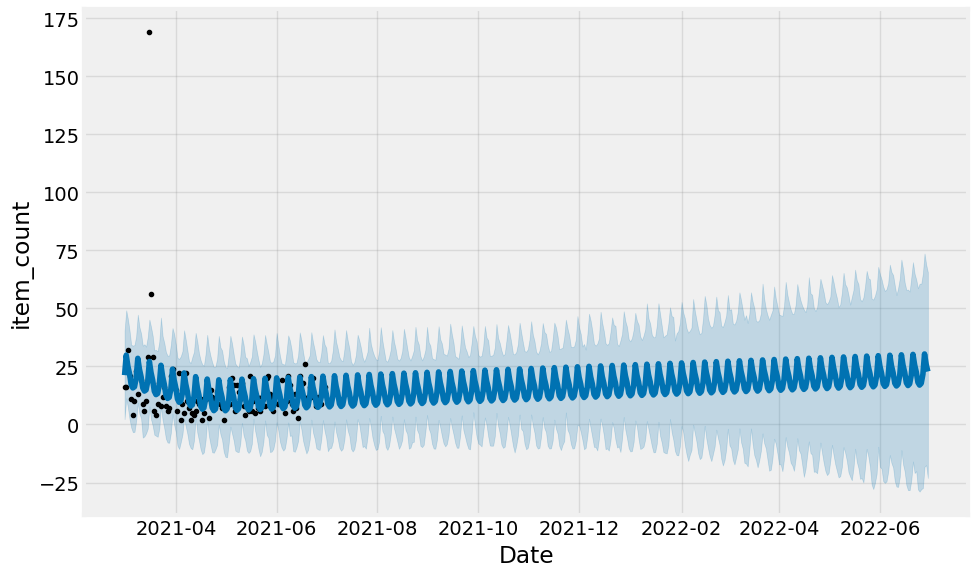

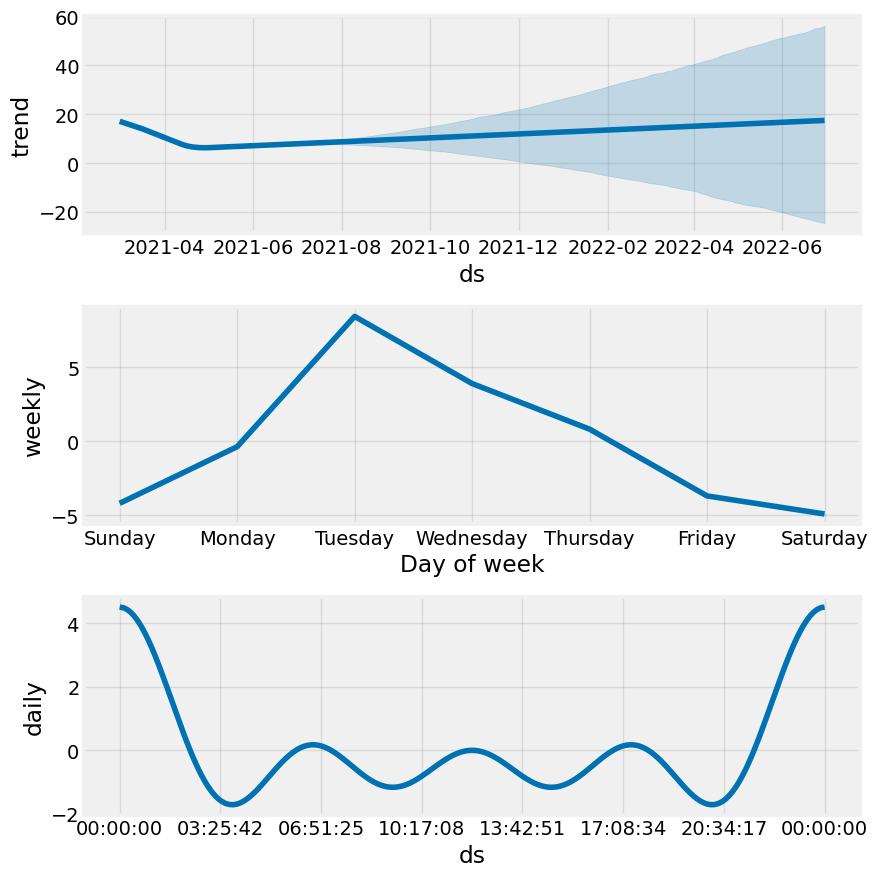

In [ ]:
plt.clf
fig2 = df_prophet.plot_components(df_forcast)
plt.show()

In [263]:
from fbprophet.diagnostics import cross_validation
#  initial  : 초기 훈련기간 일반적으로 horizon의 3배의 수치를 넣는다
#  period :  initial의 크기 및 간격을 지정
# horizon
df_cv = cross_validation(df_prophet,initial='15 days',period='3 days', horizon='5 days')
df_cv.head()

INFO:fbprophet:Making 34 forecasts with cutoffs between 2021-03-18 00:00:00 and 2021-06-25 00:00:00
 85%|████████▌ | 29/34 [01:24<00:18,  3.67s/it]

KeyboardInterrupt: 

In [264]:
from fbprophet.diagnostics import cross_validation
#  initial  : 초기 훈련기간 일반적으로 horizon의 3배의 수치를 넣는다
#  period :  initial의 크기 및 간격을 지정
# horizon
init_num = len(test_df)//1.4
hori_num = init_num//3
period_num = hori_num//2
df_cv = cross_validation(df_prophet,initial=f'{init_num} days',period=f'{period_num} days', horizon=f'{hori_num} days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-06-01 00:00:00 and 2021-06-01 00:00:00
100%|██████████| 1/1 [00:05<00:00,  5.43s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-02,13.752484,-7.703541,36.634590,9,2021-06-01
1,2021-06-03,10.770024,-10.210279,31.819518,10,2021-06-01
2,2021-06-04,4.095295,-16.659223,25.801946,19,2021-06-01
3,2021-06-05,3.881942,-18.337686,24.509529,8,2021-06-01
4,2021-06-06,5.206771,-15.959625,25.331996,5,2021-06-01


In [265]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,11.589522,3.404339,2.761254,0.302528,0.302528,1.0
1,3 days,111.371578,10.553273,7.837364,0.430730,0.430730,1.0
2,4 days,119.554309,10.934089,9.511381,0.649608,0.649608,1.0
3,5 days,8.500577,2.915575,2.162415,0.278056,0.278056,1.0
4,6 days,0.024311,0.155920,0.141686,0.024507,0.024507,1.0


C:\Users\painc\Anaconda3\envs\iitp_keras\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\painc\Anaconda3\envs\iitp_keras\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


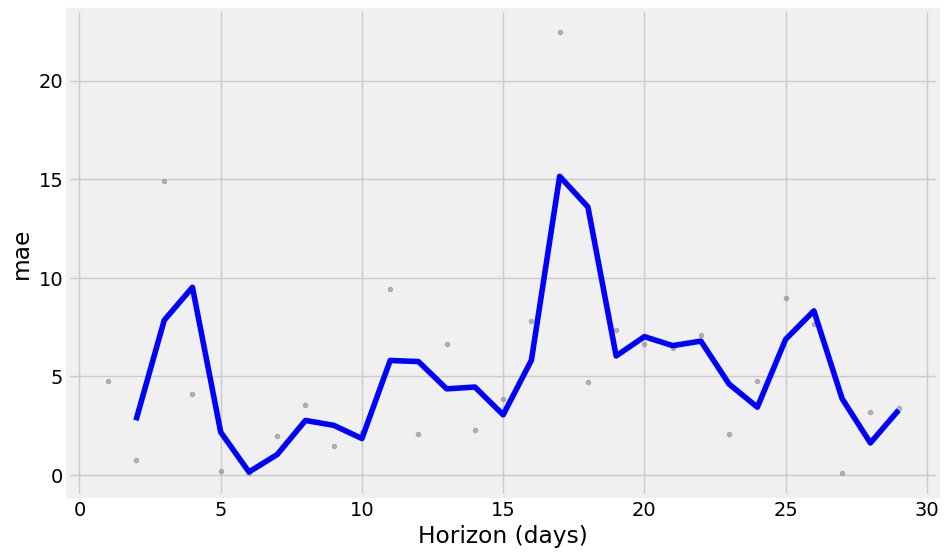

In [266]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric= 'mae')
plt.clf
plt.show()